In [ ]:
import warnings
warnings.filterwarnings("ignore")
from evaluation.mol_structure import list_of_smiles_to_nx_graphs,list_of_nx_graphs_to_smiles
from evaluation.mol_structure import draw_one_mol, draw_graphs
from evaluation.new_structural_metric import symmetric_graph_set_distance,atom,cycle,neighborhood
from evaluate import evaluate
from evaluation.moses.metrics.metrics import get_all_metrics
#import utils.graph_generators as gen
import torch
import networkx as nx
import os 
import sys
import json
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
import rdkit
import numpy as np
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess,get_graph_data, get_generated_graph_data


# Molecular graphs

## NN and Structural

In [2]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn', 'structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn','swingnn']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            try:
                print(dataset_name+split, generator)
                train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
                generated_graphs, generated_targets=get_generated_data(dataset_name+split,generator_name=generator)
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                print(metrics)
            except: continue

ames_25 hiervae
Now computing classifier based metrics
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Now computing structural based metrics
{'activations_time': 0.09956002235412598, 'fid': 121.43980869505069, 'fid_time': 0.1364603042602539, 'kid': 9.407128, 'kid_time': 5.282078981399536, 'precision': 0.989516129032258, 'recall': 0.10761979575805185, 'f1_pr': 0.1941428611167597, 'precision_time': 0.4799468517303467, 'recall_time': 0.4799468517303467, 'f1_pr_time': 0.4799468517303467, 'density': 0.6798387096774194, 'coverage': 0.07619795758051846, 'f1_dc': 0.13705290587852567, 'density_time': 0.1983027458190918, 'coverage_time': 0.1983027458190918, 'f1_dc_time': 0.1983027458190918, 'mmd_rbf': 0.693780779838562, 'mmd_rbf_time': 0.4344770908355713, 'mmd_linear': 91.9198, 'mmd_linear_time': 0.09968805313

In [3]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
device=torch.device('cpu')
metrics={}
for generator in ['train1']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train1_graphs , train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
{'activations_time': 0.205826997756958, 'fid': -2.2567547830476542e-08, 'fid_time': 0.22293400764465332, 'kid': -0.8460189, 'kid_time': 0.2536158561706543, 'precision': 1.0, 'recall': 1.0, 'f1_pr': 1.00001, 'precision_time': 0.5248329639434814, 'recall_time': 0.5248329639434814, 'f1_pr_time': 0.5248329639434814, 'density': 1.2000000000000002, 'coverage': 1.0, 'f1_dc': 1.090919173552968, 'density_time': 0.5214190483093262, 'coverage_time': 0.5214190483093262, 'f1_dc_time': 0.5214190483093262, 'mmd_rbf': 0, 'mmd_rbf_time': 2.4878199100494385, 'mmd_linear': 0.0, 'mmd_linear_time': 0.2059192657470703, 'wl_mmd': 0.0015710919088766694, 'wl_mmd_time': 1.4966740608215332, 'nspdk_mmd': 0.0, 'nspdk_mmd_time': 17.289324045181274, 'degree_mmd': 0.0, 'degree_mmd_time': 15.477958, 'cluster_mmd': 0.0, 'cluster_mmd_time': 47.859157, 'spectral_mmd': 0.0, 'spectral_mmd_time': 27.999799, 'dataset': 'ames_25', 'generator

In [4]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
device=torch.device('cpu')
metrics={}
for generator in ['train2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train2_graphs , train2_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
{'activations_time': 0.10147595405578613, 'fid': 1.4660582353586875, 'fid_time': 0.10389494895935059, 'kid': 0.0047137737, 'kid_time': 0.17413687705993652, 'precision': 0.9725058915946583, 'recall': 0.9772191673212883, 'f1_pr': 0.9748668325675071, 'precision_time': 0.25678300857543945, 'recall_time': 0.25678300857543945, 'f1_pr_time': 0.25678300857543945, 'density': 0.9828750981932443, 'coverage': 0.9544383346425765, 'f1_dc': 0.968458014728379, 'density_time': 0.20164799690246582, 'coverage_time': 0.20164799690246582, 'f1_dc_time': 0.20164799690246582, 'mmd_rbf': 0.001860097050666809, 'mmd_rbf_time': 0.35903191566467285, 'mmd_linear': 0.11226013, 'mmd_linear_time': 0.10156369209289551, 'wl_mmd': 0.0015710919088766694, 'wl_mmd_time': 1.1559269428253174, 'nspdk_mmd': 0.0014639358151066206, 'nspdk_mmd_time': 7.275412082672119, 'degree_mmd': 0.00026359444890333705, 'degree_mmd_time': 15.049171, 'cluster_m

In [9]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 

device=torch.device('cpu')
metrics={}
for generator in ['train1/2+train2/2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            half=len(train1_graphs)//2
            half2=len(train2_graphs)//2
            train3_graphs,train3_targets=train1_graphs[:half]+train2_graphs[:half], train1_targets[:half]+train2_targets[:half]
            generated_graphs, generated_targets=train3_graphs , train3_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
{'activations_time': 0.09974908828735352, 'fid': 0.24249419973378394, 'fid_time': 0.10203099250793457, 'kid': -0.081168294, 'kid_time': 0.1722853183746338, 'precision': 0.9779874213836478, 'recall': 0.98586017282011, 'f1_pr': 0.9819180169608542, 'precision_time': 0.2650468349456787, 'recall_time': 0.2650468349456787, 'f1_pr_time': 0.2650468349456787, 'density': 1.1012578616352202, 'coverage': 0.9960722702278083, 'f1_dc': 1.0460374499055485, 'density_time': 0.17034506797790527, 'coverage_time': 0.17034506797790527, 'f1_dc_time': 0.17034506797790527, 'mmd_rbf': 0.0007862589554861188, 'mmd_rbf_time': 0.4163191318511963, 'mmd_linear': 0.04453964, 'mmd_linear_time': 0.09984517097473145, 'wl_mmd': 0.0015717094764509134, 'wl_mmd_time': 1.1825032234191895, 'nspdk_mmd': 0.000690534762784023, 'nspdk_mmd_time': 7.225302219390869, 'degree_mmd': 5.5570335422139294e-05, 'degree_mmd_time': 14.841549, 'cluster_mmd': 

## Molecular metrics

In [2]:
from evaluation.moses.metrics.metrics import get_all_metrics
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits2=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn','swingnn']
device=torch.device('cpu')
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits2:
            try:
                print(dataset_name+split, generator)
                graphs, splits =get_data(dataset_name+split, return_smiles=True)
                train1_smiles=splits['train1_pos_smiles']+splits['train1_neg_smiles'] 
                _,_, generated_smiles=get_generated_data(dataset_name+split,generator_name=generator,return_smiles=True)
                metrics=get_all_metrics(gen=generated_smiles,train=train1_smiles,test=train1_smiles)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                print(metrics)
            except: print('skipping',dataset_name+split,generator )


ames_25 hiervae
{'valid': 1.0, 'unique@1000': 0.145, 'unique@10000': 0.13825608798114689, 'FCD/Test': nan, 'SNN/Test': 0.348708565883157, 'Frag/Test': 0.013272850498846966, 'Scaf/Test': 0.0, 'FCD/TestSF': nan, 'SNN/TestSF': 0.139073268565271, 'Frag/TestSF': 0.004383346567101043, 'Scaf/TestSF': 5.129849552776289e-05, 'IntDiv': 0.9134372697936957, 'IntDiv2': 0.8022391734161626, 'Filters': 0.5899450117831894, 'logP': 2.3025266142969376, 'SA': 1.0495216446818627, 'QED': 0.14122392510170212, 'weight': 184.69842026708568, 'Novelty': 0.9602272727272727, 'dataset': 'ames_25', 'generator_name': 'hiervae'}
ames_33 hiervae
{'valid': 1.0, 'unique@1000': 0.283, 'unique@10000': 0.21908127208480566, 'FCD/Test': nan, 'SNN/Test': 0.41103180557998387, 'Frag/Test': 0.05517955406248831, 'Scaf/Test': 0.0, 'FCD/TestSF': nan, 'SNN/TestSF': 0.16034279524340997, 'Frag/TestSF': 0.024627409936979094, 'Scaf/TestSF': 1.1536177293436367e-05, 'IntDiv': 0.8881725070117816, 'IntDiv2': 0.7982084018295063, 'Filters': 0.

In [3]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits2=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['train1']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits2:
            print(dataset_name+split)
            graphs, splits =get_data(dataset_name+split, return_smiles=True)
            train1_smiles=splits['train1_pos_smiles']+splits['train1_neg_smiles'] 
            metrics=get_all_metrics(gen=train1_smiles,train=train1_smiles,test=train1_smiles)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
{'valid': 1.0, 'unique@1000': 0.999, 'unique@10000': 0.9992144540455616, 'FCD/Test': -5.897504706808832e-13, 'SNN/Test': 1.0, 'Frag/Test': 1, 'Scaf/Test': 1, 'FCD/TestSF': 22.86709631204034, 'SNN/TestSF': 0.3347151500742827, 'Frag/TestSF': 0.73004374760866, 'Scaf/TestSF': 0.15573039734059768, 'IntDiv': 0.9115402706318827, 'IntDiv2': 0.891055559854274, 'Filters': 0.5648075412411626, 'logP': 0.0, 'SA': 0.0, 'QED': 0.0, 'weight': 0.0, 'Novelty': 0.0007861635220125787, 'dataset': 'ames_25', 'generator_name': 'train1'}
ames_33
{'valid': 1.0, 'unique@1000': 1.0, 'unique@10000': 1.0, 'FCD/Test': -3.552713678800501e-14, 'SNN/Test': 1.0, 'Frag/Test': 1, 'Scaf/Test': 1, 'FCD/TestSF': 22.327406109544697, 'SNN/TestSF': 0.33650527514069745, 'Frag/TestSF': 0.7477493218977074, 'Scaf/TestSF': 0.17318521765311345, 'IntDiv': 0.9104997907594112, 'IntDiv2': 0.8916725488350729, 'Filters': 0.558303886925795, 'logP': 0.0, 'SA': 0.0, 'QED': 0.0, 'weight': 0.0, 'Novelty': 0.0005889281507656066, 'datase

In [4]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits2=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['train2']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits2:
            print(dataset_name+split)
            graphs, splits =get_data(dataset_name+split, return_smiles=True)
            train1_smiles=splits['train1_pos_smiles']+splits['train1_neg_smiles'] 
            train2_smiles=splits['train2_pos_smiles']+splits['train2_neg_smiles'] 
            metrics=get_all_metrics(gen=train2_smiles,train=train1_smiles,test=train1_smiles)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
{'valid': 1.0, 'unique@1000': 1.0, 'unique@10000': 0.9989531536247056, 'FCD/Test': 1.132781398442745, 'SNN/Test': 0.5007087983087668, 'Frag/Test': 0.9854536859352884, 'Scaf/Test': 0.8231722286055675, 'FCD/TestSF': 22.029601287384125, 'SNN/TestSF': 0.33657932424812037, 'Frag/TestSF': 0.7487760042007859, 'Scaf/TestSF': 0.1758219187605672, 'IntDiv': 0.9099865986374363, 'IntDiv2': 0.8923639507448167, 'Filters': 0.5563988484689871, 'logP': 0.07196985365326163, 'SA': 0.027136031203690632, 'QED': 0.010619889388903457, 'weight': 3.5092433578604902, 'Novelty': 0.9986900707361802, 'dataset': 'ames_25', 'generator_name': 'train2'}
ames_33
{'valid': 1.0, 'unique@1000': 0.997, 'unique@10000': 0.998527679623086, 'FCD/Test': 0.8893141450986164, 'SNN/Test': 0.5292494926553382, 'Frag/Test': 0.9860238732965643, 'Scaf/Test': 0.8690412350733876, 'FCD/TestSF': 22.174544521204453, 'SNN/TestSF': 0.3359175579528049, 'Frag/TestSF': 0.7413823668079597, 'Scaf/TestSF': 0.17036759946248248, 'IntDiv': 0.910

In [5]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits2=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn','structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['train1/2+train2/2']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
            for split in splits2:
                print(dataset_name+split)
                graphs, splits =get_data(dataset_name+split, return_smiles=True)
                train1_smiles=splits['train1_pos_smiles']+splits['train1_neg_smiles'] 
                train2_smiles=splits['train2_pos_smiles']+splits['train2_neg_smiles'] 
                half=len(train1_smiles)//2
                train3_smiles=train1_smiles[:half] + train2_smiles[:half]
                metrics=get_all_metrics(gen=train3_smiles,train=train1_smiles,test=train1_smiles)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                print(metrics)

ames_25
{'valid': 1.0, 'unique@1000': 0.998, 'unique@10000': 0.9984276729559748, 'FCD/Test': 1.9783193657946896, 'SNN/Test': 0.7649682581002982, 'Frag/Test': 0.9654669694771763, 'Scaf/Test': 0.8675273475422114, 'FCD/TestSF': 25.354847994959307, 'SNN/TestSF': 0.33013679580352967, 'Frag/TestSF': 0.7388515721053711, 'Scaf/TestSF': 0.15319952288927885, 'IntDiv': 0.8997493115559178, 'IntDiv2': 0.8773922171598226, 'Filters': 0.44261006289308175, 'logP': 0.07163966596387465, 'SA': 0.07846943401822182, 'QED': 0.02567526277615055, 'weight': 12.228753396004095, 'Novelty': 0.5, 'dataset': 'ames_25', 'generator_name': 'train1/2+train2/2'}
ames_33
{'valid': 1.0, 'unique@1000': 0.999, 'unique@10000': 0.997055359246172, 'FCD/Test': 1.7688891664604967, 'SNN/Test': 0.7787179341111925, 'Frag/Test': 0.9745092310849698, 'Scaf/Test': 0.8822344478224453, 'FCD/TestSF': 24.933689002470544, 'SNN/TestSF': 0.3279936072648063, 'Frag/TestSF': 0.7399579056395017, 'Scaf/TestSF': 0.11451080145027615, 'IntDiv': 0.9014

# Synthetic graphs

In [6]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn','structural', 'auc_roc']
generators=['swingnn','gdss']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
                print(dataset_name+split)
                train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
                generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
                splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
                metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
                metrics['dataset']=dataset_name+split
                metrics['generator_name']=generator
                print(metrics)

synthetic_1_25
Now computing classifier based metrics
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Now computing structural based metrics
Now computing the auc_roc based  metric
0.7019 0.7620000000000001 0.63285 0.6923499999999999
{'activations_time': 0.029078960418701172, 'fid': 9.235885385554816, 'fid_time': 0.04165983200073242, 'kid': 1.0623387, 'kid_time': 4.886414051055908, 'precision': 0.9207920792079208, 'recall': 0.985, 'f1_pr': 0.9518244384488885, 'precision_time': 0.1495516300201416, 'recall_time': 0.1495516300201416, 'f1_pr_time': 0.1495516300201416, 'density': 1.0900990099009902, 'coverage': 0.99, 'f1_dc': 1.0376510341525584, 'density_time': 0.06250119209289551, 'coverage_time': 0.06250119209289551, 'f1_dc_time': 0.06250119209289551, 'mmd_rbf': 0.022628068923950195, 'mmd_rbf_time': 0.08

In [7]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn','structural', 'auc_roc']
generators=['train2']
splits=['_25','_33','_40','_50']
metrics={}
for generator in ['train2']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets=train1_graphs,train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

synthetic_1_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing the auc_roc based  metric
0.7019 0.7620000000000001 0.7019 0.7019
{'activations_time': 0.02608203887939453, 'fid': -2.0029057026249575e-06, 'fid_time': 0.0346980094909668, 'kid': -0.01605463, 'kid_time': 0.04615974426269531, 'precision': 1.0, 'recall': 1.0, 'f1_pr': 1.00001, 'precision_time': 0.11622118949890137, 'recall_time': 0.11622118949890137, 'f1_pr_time': 0.11622118949890137, 'density': 1.2000000000000002, 'coverage': 1.0, 'f1_dc': 1.090919173552968, 'density_time': 0.0601191520690918, 'coverage_time': 0.0601191520690918, 'f1_dc_time': 0.0601191520690918, 'mmd_rbf': 0, 'mmd_rbf_time': 0.08414888381958008, 'mmd_linear': 0.0, 'mmd_linear_time': 0.026112794876098633, 'wl_mmd': 0.01, 'wl_mmd_time': 0.22346997261047363, 'nspdk_mmd': 0.0, 'nspdk_mmd_time': 4.487196922302246, 'degree_mmd': 0.0, 'degree_mmd_time': 7.459256, 'cluster_mmd': 0.0, 'cluster_mmd_time': 7.6422, 'spectral_

In [8]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn','structural', 'auc_roc']
generators=['train2']
splits=['_25','_33','_40','_50']
metrics={}
for generator in ['train2']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets=train2_graphs,train2_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


synthetic_1_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing the auc_roc based  metric
0.7019 0.7620000000000001 0.7061000000000001 0.7620000000000001
{'activations_time': 0.027743101119995117, 'fid': 0.22082493666322733, 'fid_time': 0.039604902267456055, 'kid': -0.0011681318, 'kid_time': 0.04436516761779785, 'precision': 0.98, 'recall': 0.995, 'f1_pr': 0.9874530385515082, 'precision_time': 0.10157608985900879, 'recall_time': 0.10157608985900879, 'f1_pr_time': 0.10157608985900879, 'density': 1.074, 'coverage': 0.995, 'f1_dc': 1.033001798049318, 'density_time': 0.07990789413452148, 'coverage_time': 0.07990789413452148, 'f1_dc_time': 0.07990789413452148, 'mmd_rbf': 0.008512844331562519, 'mmd_rbf_time': 0.11573624610900879, 'mmd_linear': 0.036674097, 'mmd_linear_time': 0.02777695655822754, 'wl_mmd': 0.01, 'wl_mmd_time': 0.22626996040344238, 'nspdk_mmd': 0.008413956095738973, 'nspdk_mmd_time': 4.507712125778198, 'degree_mmd': 0.0002633611471185

In [9]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']
device=torch.device('cpu')
metrics_type=['nn','structural', 'auc_roc']
generators=['train2']
splits=['_25','_33','_40','_50']
metrics={}
for generator in ['train1/2+train2/2']:
    for dataset_name in ['synthetic_1','synthetic_2']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            half=len(train1_graphs)//2
            half2=len(train2_graphs)//2
            train3_graphs,train3_targets=train1_graphs[:half]+train2_graphs[:half], train1_targets[:half]+train2_targets[:half]
            generated_graphs, generated_targets=train3_graphs,train3_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

synthetic_1_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing the auc_roc based  metric
Error when computing AUC_ROC with NSPDK
{'activations_time': 0.024321794509887695, 'fid': 9.290059883266217, 'fid_time': 0.025812625885009766, 'kid': 0.34858596, 'kid_time': 0.045816659927368164, 'precision': 0.99, 'recall': 0.975, 'f1_pr': 0.9824527486743136, 'precision_time': 0.11462879180908203, 'recall_time': 0.11462879180908203, 'f1_pr_time': 0.11462879180908203, 'density': 1.084, 'coverage': 0.845, 'f1_dc': 0.9497042955490351, 'density_time': 0.08814692497253418, 'coverage_time': 0.08814692497253418, 'f1_dc_time': 0.08814692497253418, 'mmd_rbf': 0.15430372953414917, 'mmd_rbf_time': 0.11281085014343262, 'mmd_linear': 8.142916, 'mmd_linear_time': 0.024356603622436523, 'wl_mmd': 0.01, 'wl_mmd_time': 0.22548508644104004, 'nspdk_mmd': 0.0051679983346357705, 'nspdk_mmd_time': 4.490453004837036, 'degree_mmd': 0.0008051992470867742, 'degree_mmd_time': 7.340

# Data collection

## Hide

In [10]:
#disable  
from rdkit import RDLogger 
RDLogger.EnableLog('rdApp.*')
#RDLogger.DisableLog('rdApp.*')        
name='ames'                                                                                                                                                                                                                                                                                                                                                                                                                                                               
path='data/smiles/{}/train1_smiles.txt'.format(name)
#rom data.smiles.carcinogens import test_smiles
reference_smiles_list = []
with open(path) as my_file:
    for line in my_file:
        reference_smiles_list.append(line)
reference_nx_graphs=list_of_smiles_to_nx_graphs(reference_smiles_list)
"""
print(reference_smiles_list[0])
mol = Chem.MolFromSmiles(reference_smiles_list[0])
Chem.Kekulize(mol)
Chem.RemoveStereochemistry(mol)
Chem.rdmolops.AddHs(mol)
print(mol_to_smiles([mol])[0])
print(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0])
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[0]))
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]))

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )
"""

'\nprint(reference_smiles_list[0])\nmol = Chem.MolFromSmiles(reference_smiles_list[0])\nChem.Kekulize(mol)\nChem.RemoveStereochemistry(mol)\nChem.rdmolops.AddHs(mol)\nprint(mol_to_smiles([mol])[0])\nprint(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0])\nrdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[0]))\nrdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]))\n\n#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )\n\n#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )\n'

ImportError: requires pygraphviz http://pygraphviz.github.io/

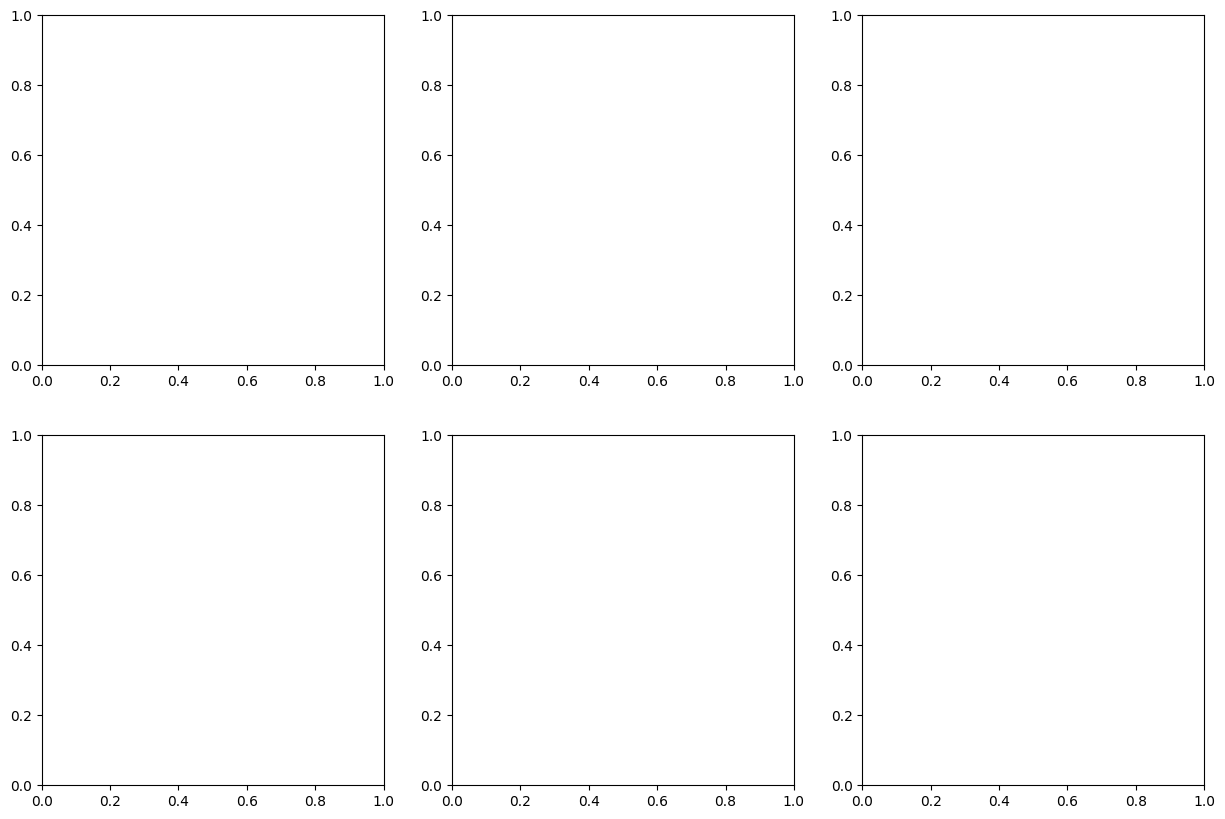

In [11]:
list_of_G=reference_nx_graphs[:4]
#for n , d in (G.nodes().items() ):
    #print(str(d['label'][0]))

draw_graphs(list_of_G)

[N-]=[N+]=CC(=O)NCC(=O)NN



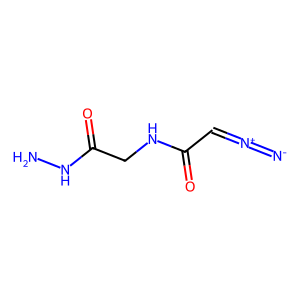

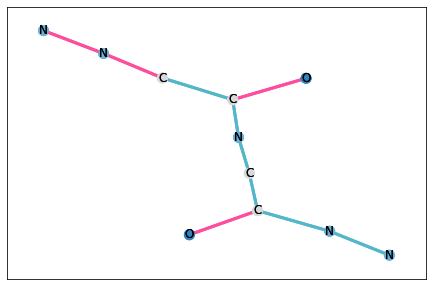

In [ ]:
draw_one_mol(reference_nx_graphs[2])
print(reference_smiles_list[2])
draw_one_mol(reference_nx_graphs[2])

rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[2]))


In [ ]:
reference_nx_graphs[0].nodes(data=True)

NodeDataView({0: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 1: {'label': 7, 'attr': [6, 0, 3, 6, 0, 0, 1, 0, 0], 'label_name': 'N'}, 2: {'label': 8, 'attr': [7, 0, 1, 4, 0, 0, 1, 0, 0], 'label_name': 'O'}, 3: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 4: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 5: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 6: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 7: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 8: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 9: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 10: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 11: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 12: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 13: {'label': 6, 'attr': [5, 0, 3,

In [ ]:
reference_nx_graphs[0].edges(data=True)

EdgeDataView([(0, 1, {'label': 2, 'attr': [1, 0, 1], 'edge_label': 'DOUBLE'}), (1, 2, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (1, 3, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (3, 4, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (3, 16, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (4, 5, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (4, 22, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (5, 6, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (5, 19, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (6, 7, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (6, 17, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (7, 8, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (8, 9, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (9, 10, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (9, 18, {'label': 1, 'attr': [3, 0, 1], 'edge_label':

## Show


In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral']#'common_substructures']
metrics_type=['nn', 'structural']#'molecular']
#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn','swingnn']



In [ ]:
device=torch.device('cpu')
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Now computing structural based metrics
{'activations_time': 0.4745817184448242, 'fid': 89.37352740009594, 'fid_time': 0.4916257858276367, 'kid': 5.7525334, 'kid_time': 41.67520999908447, 'precision': 0.9975980784627703, 'recall': 0.25216025137470544, 'f1_pr': 0.402578719623196, 'precision_time': 0.9364092350006104, 'recall_time': 0.9364092350006104, 'f1_pr_time': 0.9364092350006104, 'density': 0.9651721377101682, 'coverage': 0.13904163393558522, 'f1_dc': 0.24308286295937623, 'density_time': 0.6416990756988525, 'coverage_time': 0.6416990756988525, 'f1_dc_time': 0.6416990756988525, 'mmd_rbf': 0.484066367149353, 'mmd_rbf_time': 1.4535744190216064, 'mmd_linear': 66.20517, 'mmd_linear_time': 0.4745817184448242, '

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train1']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train1_graphs,train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Now computing structural based metrics
{'activations_time': 0.09497904777526855, 'fid': -2.05708658995718e-08, 'fid_time': 0.10605001449584961, 'kid': -1.0951546, 'kid_time': 4.503940105438232, 'precision': 1.0, 'recall': 1.0, 'f1_pr': 1.00001, 'precision_time': 0.5347938537597656, 'recall_time': 0.5347938537597656, 'f1_pr_time': 0.5347938537597656, 'density': 1.2001571091908878, 'coverage': 1.0, 'f1_dc': 1.0909840901883978, 'density_time': 0.31894588470458984, 'coverage_time': 0.31894588470458984, 'f1_dc_time': 0.31894588470458984, 'mmd_rbf': 0, 'mmd_rbf_time': 0.5747997760772705, 'mmd_linear': 0.0, 'mmd_linear_time': 0.09510588645935059, 'wl_mmd': 0.0015710919088766694, 'wl_mmd_time': 1.1218819618225098, '

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train2_graphs,train2_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
{'activations_time': 0.10030484199523926, 'fid': 4.865800534791404, 'fid_time': 0.10283994674682617, 'kid': 0.19350207, 'kid_time': 0.1501750946044922, 'precision': 0.9685781618224666, 'recall': 0.9732914375490966, 'f1_pr': 0.9709390797498794, 'precision_time': 0.2710459232330322, 'recall_time': 0.2710459232330322, 'f1_pr_time': 0.2710459232330322, 'density': 0.9538098978790259, 'coverage': 0.9536527886881383, 'f1_dc': 0.9537413368134584, 'density_time': 0.20402002334594727, 'coverage_time': 0.20402002334594727, 'f1_dc_time': 0.20402002334594727, 'mmd_rbf': 0.001806885004043579, 'mmd_rbf_time': 0.40337681770324707, 'mmd_linear': 0.103768684, 'mmd_linear_time': 0.10039353370666504, 'wl_mmd': 0.0015710919088766694, 'wl_mmd_time': 1.1708450317382812, 'nspdk_mmd': 0.0014388091537828052, 'nspdk_mmd_time': 7.240663766860962, 'degree_mmd': 0.00026359444890333705, 'degree_mmd_time': 13.983711, 'cluster_mmd': 

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['train1/2+train2/2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            half=len(train1_graphs)//2
            half2=len(train2_graphs)//2
            train3_graphs,train3_targets=train1_graphs[:half]+train2_graphs[:half], train1_targets[:half]+train2_targets[:half]
            generated_graphs, generated_targets=train3_graphs,train3_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

## Dev

## Vectorize


In [ ]:
from eden.ml.ml import serial_vectorize as vectorize
from eden.graph import Vectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

estimator =ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0)
generator='stgg'
dataset_name='cyp1a2_veith'
metrics_type=['auc_roc']
train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
train_graphs, train_targets=train1_graphs +  train2_graphs , list(train1_targets)+list(train2_targets)
train1_plus_generated_targets=list(train1_targets)+list(generated_targets)   
   
vectorizer = Vectorizer(
            r=2, d=4,
            normalization=False,
            inner_normalization=False,
            discrete=True,
            nbits=10)

def serialize(train_graphs,test_graphs,train1_graphs,generated_graphs):
        X_train=vectorize(train_graphs,vectorizer=vectorizer).toarray()
        X_test=vectorize(test_graphs,vectorizer=vectorizer).toarray()
        X_train1=vectorize(train1_graphs,vectorizer=vectorizer).toarray()
        X_generated=vectorize(generated_graphs,vectorizer=vectorizer).toarray()
        X_train1_plus_generated=np.vstack((X_train1,X_generated))
        return X_train,X_test,X_train1,X_generated,X_train1_plus_generated
X_train,X_test,X_train1,X_generated,X_train1_plus_generated=serialize(train_graphs,test_graphs,train1_graphs,generated_graphs)

def predict(test_embedding):
        preds= estimator.predict_proba(test_embedding)[:,1]
        return preds
def compute_auc(X_train, train_targets,X_test, test_targets):
    estimator.fit( X_train,train_targets)
    preds=predict(X_test )
    auc=roc_auc_score(test_targets, preds)
    return auc

auc_1= compute_auc(X_train1, train1_targets, X_test, test_targets)
auc_2=compute_auc(X_train, train_targets, X_test, test_targets)
auc_3=compute_auc(X_generated, generated_targets, X_test, test_targets)
auc_4=compute_auc( X_train1_plus_generated,train1_plus_generated_targets, X_test, test_targets)
print(auc_1, auc_2,auc_3,auc_4 )


In [ ]:
metrics={}

metrics_type=['auc_roc']
for generator in ['stgg','gdss','hiervae','moflow','wgan']:
    for dataset_name in ['cyp1a2_veith']:
        train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
        generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
        splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
        metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
        metrics['dataset']=dataset_name
        metrics['generator_name']=generator
        print(metrics)

Now computing the auc_roc based  metric
0.595007555474423 0.847280853210823 0.4850858611212527 0.56162909212608
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 192.33314204216003, 'dataset': 'cyp1a2_veith', 'generator_name': 'stgg'}
Now computing the auc_roc based  metric
0.9063466619001258 0.9225681133625412 0.5415437000527361 0.901334821609671
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 161.56497645378113, 'dataset': 'cyp1a2_veith', 'generator_name': 'gdss'}
Now computing the auc_roc based  metric
0.9085933379984584 0.9232190757981421 0.6721123762727679 0.9059112079631657
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 148.0914294719696, 'dataset': 'cyp1a2_veith', 'generator_name': 'hiervae'}
Now computing the auc_roc based  metric
0.8755

# New metric  (Step 1 and Step 2)

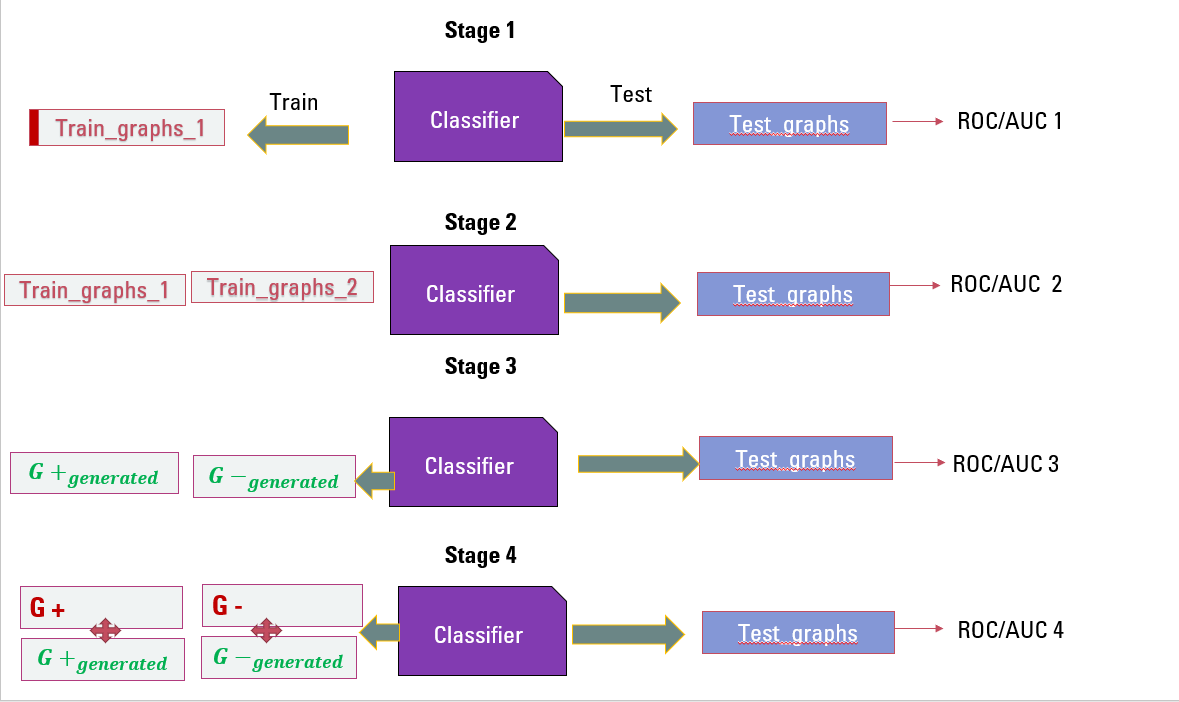

# NN classifier  with ogb AtomEncoder, BondEncoder

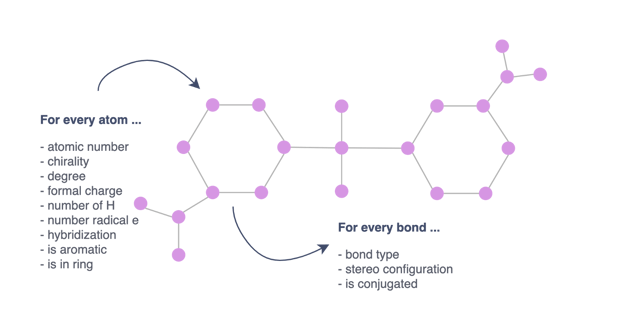